# Table of Contents
01. Importing libraries
02. Importing data
03. Create a correlation matrix heatmap (colored)
04. Create a scatterplot for the variables with the strongest correlations
05. Create a pair plot of the entire data set
06. Create a categorical plot and interpret the results
07. Business questions
<br>I. Original questions
<br>II. New questions
08. Define hypotheses
09. Export dataframe

# 01. Importing libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

# 02. Importing data

In [2]:
# Define csv path
path = r'C:\Users\lucav\Desktop\CareerFoundry\Projects\Project 5 - House Sales in King County, USA'

In [3]:
# Import data from 'kc_house_data.csv'
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'kc_house_data_wrangled&cleaned.csv'), index_col = 0)

In [4]:
# Check the number of rows and columns
df.shape

(21613, 20)

In [5]:
# Display the top 5 rows
pd.set_option('display.max_columns', None)
df.head(5)

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  2014-10  221900.0         3       1.00         1180      5650     1.0   
1  2014-12  538000.0         3       2.25         2570      7242     2.0   
2  2015-02  180000.0         2       1.00          770     10000     1.0   
3  2014-12  604000.0         4       3.00         1960      5000     1.0   
4  2015-02  510000.0         3       2.00         1680      8080     1.0   

   waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  \
0           0     0          3      7        1180              0      1955   
1           0     0          3      7        2170            400      1951   
2           0     0          3      6         770              0      1933   
3           0     0          5      7        1050            910      1965   
4           0     0          3      8        1680              0      1987   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0             0    98178  47.5112 -122.257           1340        5650  
1          1991    98125  47.7210 -122.319           1690        7639  
2             0    98028  47.7379 -122.233           2720        8062  
3             0    98136  47.5208 -122.393           1360        5000  
4             0    98074  47.6168 -122.045           1800        7503

In [6]:
# Display columns
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

# 03. Create a correlation matrix heatmap (colored)

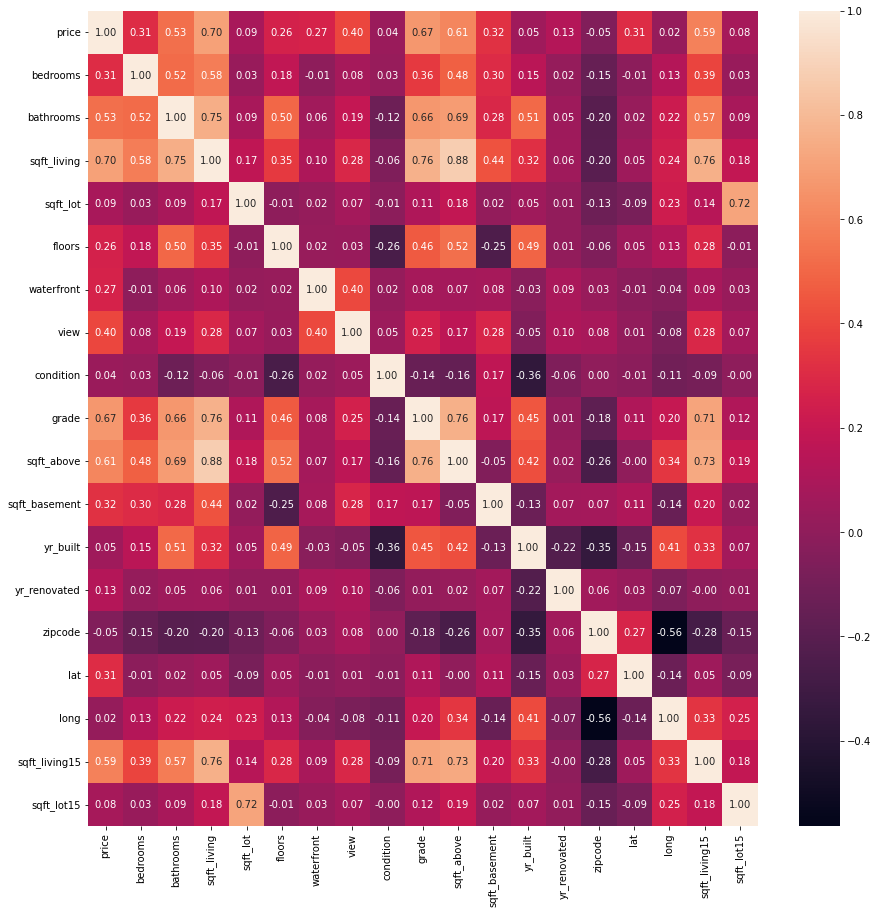

In [7]:
# Create a subplot with matplotlib
f, ax = plt.subplots(figsize=(15,15))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix
corr1 = sns.heatmap(df.corr(), annot = True, fmt='.2f', ax = ax)

# Save plot
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', "corr1.png"))

Our goal is to identify the features with the largest impact on home sales prices, thus we can investigate the correlation between each feature and the "price" variable.

In [8]:
# Display the correlation between each feature and the 'price' variable
df.corr()["price"].sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
zipcode         -0.053203
Name: price, dtype: float64

As shown above, the features displaying a strong positive relationship (i.e. correlation coefficient above 0.5) with the "price" variable are the following:
- **sqft_living**: size of living area (square feet)
- **grade**: classification by construction quality (higher grade indicates better quality)
- **sqft_above**: square feet above ground
- **sqft_living15**: average size of interior housing living space for the closest 15 houses (square feet)
- **bathrooms**: number of bathrooms

In [9]:
# Create a subset including only 'price', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15' and 'bathrooms'
sub = df[['price', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms']]

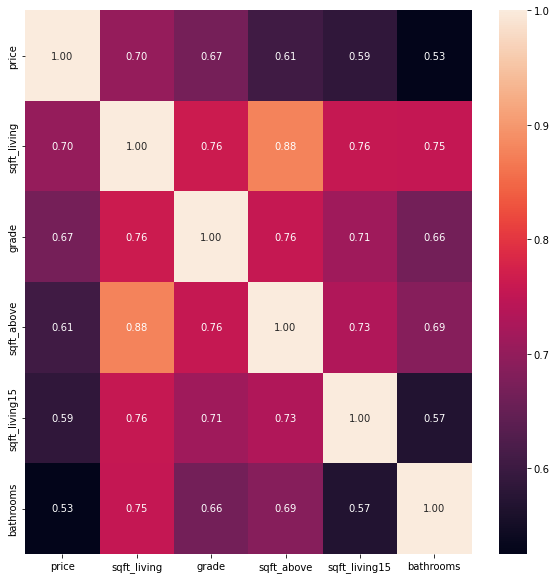

In [10]:
# Create a subplot with matplotlib
f, ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix
corr2 = sns.heatmap(sub.corr(), annot = True, fmt='.2f', ax = ax)

# Save plot
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', "corr2.png"))

The heatmap above zooms in on the features that display a strong positive relationship with the "price" variable.
As it can be seen, the **size of the living area** seems to impact the house price the most (corr. coeff. = 0.7), followed by the **construction quality** (corr. coeff. = 0.67), the **total square footage above ground** (corr. coeff. = 0.61), the **size of the living area for the closest 15 houses** (corr. coeff. = 0.59) and, finally, the **number of bathrooms** (corr. coeff. = 0.53).

# 04. Create a scatterplot for the variables with the strongest correlations

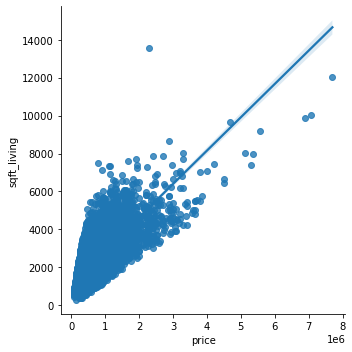

In [11]:
# Create a scatterplot for the 'price' and 'sqft_living' columns in seaborn
scatter1 = sns.lmplot(x = 'price', y = 'sqft_living', data = df)

# Save plot
scatter1.savefig(os.path.join(path, '04 Analysis', 'Visualizations', "scatter1.png"))

The scatterplot shows a strong positive relationship between 'price' and 'sqft_living', i.e. as one variable increases the other does too, indicating that **a larger living area equates to a higher sales price**.
<br> It can also be observed that more data points cluster around the regression line at lower prices, while there is a greater degree of variability at higher prices where the data points are scattered more widely.

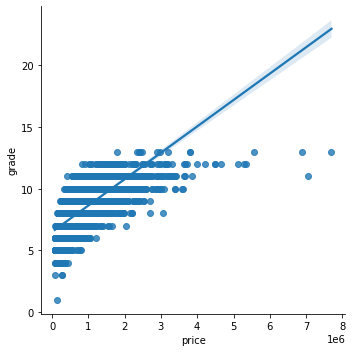

In [12]:
# Create a scatterplot for the 'price' and 'grade' columns in seaborn
scatter2 = sns.lmplot(x = 'price', y = 'grade', data = df)

# Save plot
scatter2.savefig(os.path.join(path, '04 Analysis', 'Visualizations', "scatter2.png"))

The scatterplot shows a strong positive relationship between 'price' and 'grade', i.e. as one variable increases the other does too, indicating that **a higher construction quality equates to a higher sales price**.
<br> Even though the correlation coefficient indicates a strong positive relationship between the two variables, the shape of the scatterplot suggests that a non-linear trend line may represent a better fit.
<br> It can also be observed that the data points appear more structured because the 'grade' variable is categorical.

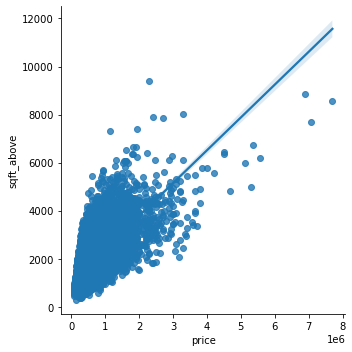

In [13]:
# Create a scatterplot for the 'price' and 'sqft_above' columns in seaborn
scatter3 = sns.lmplot(x = 'price', y = 'sqft_above', data = df)

# Save plot
scatter3.savefig(os.path.join(path, '04 Analysis', 'Visualizations', "scatter3.png"))

The scatterplot shows a strong positive relationship between 'price' and 'sqft_above', i.e. as one variable increases the other does too, indicating that **a larger total square footage above ground equates to a higher sales price**.
<br> It can also be observed that more data points cluster around the regression line at lower prices, while there is a greater degree of variability at higher prices where the data points are scattered more widely.

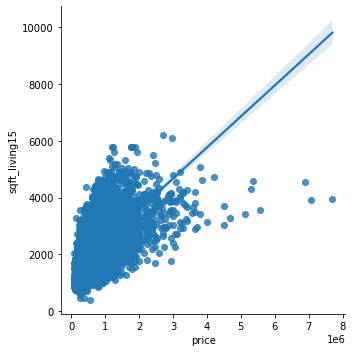

In [14]:
# Create a scatterplot for the 'price' and 'sqft_living15' columns in seaborn
scatter4 = sns.lmplot(x = 'price', y = 'sqft_living15', data = df)

# Save plot
scatter4.savefig(os.path.join(path, '04 Analysis', 'Visualizations', "scatter4.png"))

The scatterplot shows a strong positive relationship between 'price' and 'sqft_living15', i.e. as one variable increases the other does too, indicating that **a larger living area for the closest 15 houses equates to a higher sales price**.
<br>It can also be observed that more data points cluster around the regression line at lower prices, while there is a greater degree of variability at higher prices where the data points are scattered more widely.
<br>Moreover, data points at high prices tend to fall well below the regression line; perhaps, a non-linear trend line may more accurately fit the data.

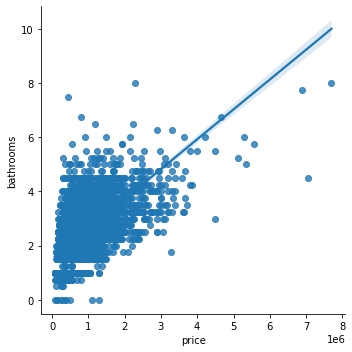

In [15]:
# Create a scatterplot for the 'price' and 'bathrooms' columns in seaborn
scatter5 = sns.lmplot(x = 'price', y = 'bathrooms', data = df)

# Save plot
scatter5.savefig(os.path.join(path, '04 Analysis', 'Visualizations', "scatter5.png"))

The scatterplot shows a strong positive relationship between 'price' and 'bathrooms', i.e. as one variable increases the other does too, indicating that **a larger number of bathrooms equates to a higher sales price**.
<br>It can also be observed that, compared to the previous scatterplots, there is a greater degree of variability and the data points are more widely scattered around the regression line, leading to a lower correlation coefficient (0.59).

# 05. Create a pair plot of the entire data set

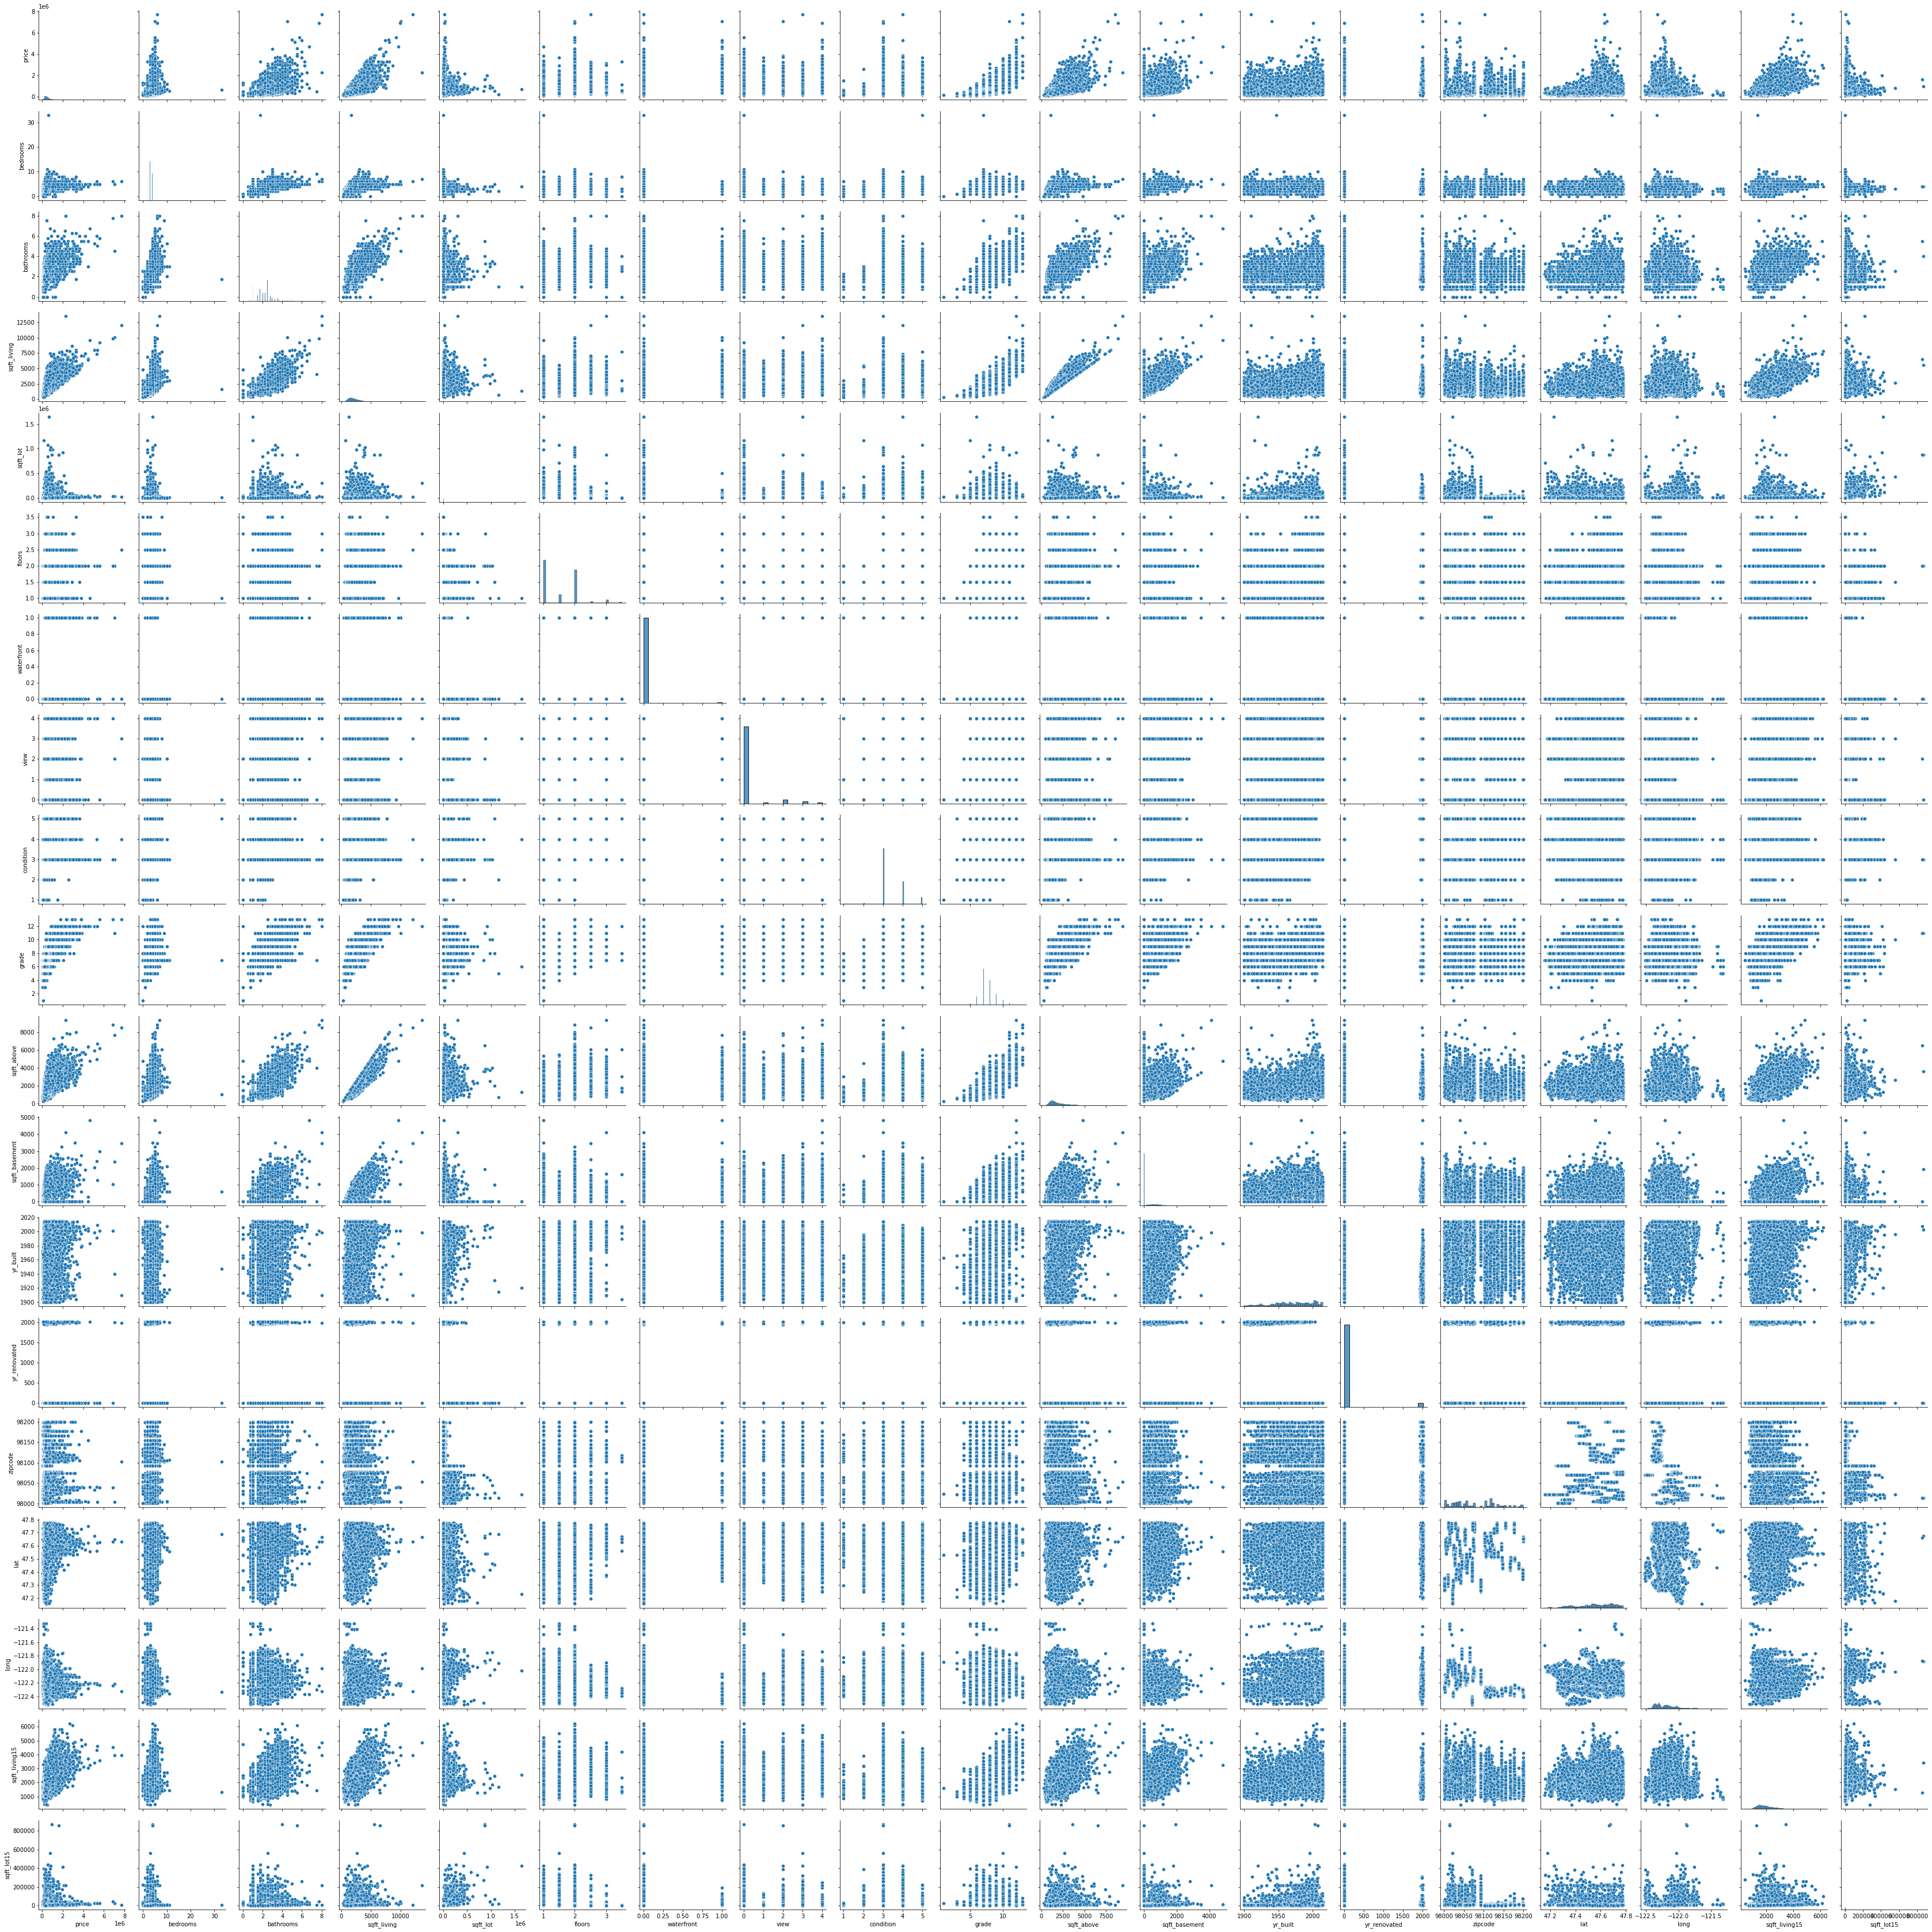

In [16]:
# Create a pair plot 
pairplot1 = sns.pairplot(df)

# Save plot
pairplot1.savefig(os.path.join(path, '04 Analysis', 'Visualizations', "pairplot1.png"))

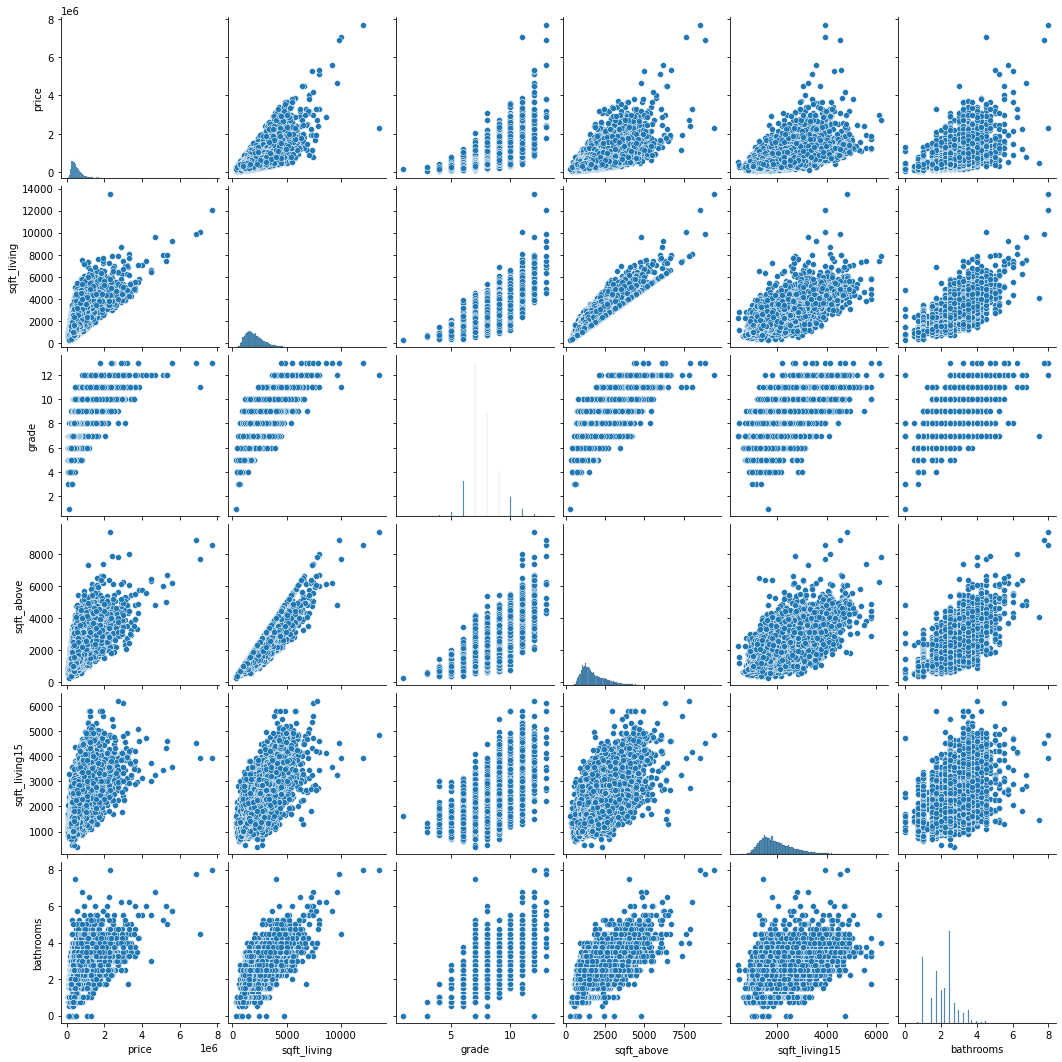

In [17]:
# Create a pair plot on 'price', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15' and 'bathrooms'
pairplot2 = sns.pairplot(sub)

# Save plot
pairplot2.savefig(os.path.join(path, '04 Analysis', 'Visualizations', "pairplot2.png"))

The pair plots above allow to investigate the relationships between all the variables in the dataframe (pair plot at the top) and between the selected variables (pair plot at the bottom).
<br> As it can be seen, this visualization provides a combination of scatterplots and histograms, allowing to plot both numeric and categorical variables.
<br><br> Additional relationships that may be worth exploring are the following:
- **'price'** and **'view'**: the heatmap only shows a moderate positive relationship between the two variables (corr. coeff. = 0.40), most likely due to the structured data in the 'view' variable (index from 0 to 4) that does not allow for a proper correlation analysis. However, the view of the property may have a large impact on sales price.
- **'price'** and **'zipcode'**: most likely some geographic areas are more expensive than others but the relationship between 'price' and 'zipcode' isn't linear. Hence, additional exploration would be required to identify how the sales price varies across different areas.

# 06. Create a categorical plot and interpret the results

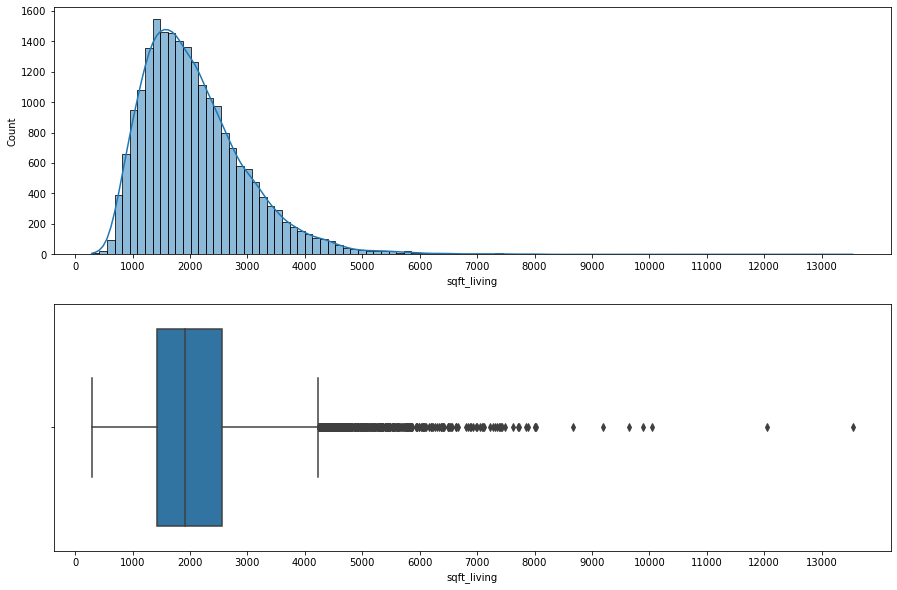

In [18]:
# Create a histogram and a boxplot to visualize the distribution of 'sqft_living'
fig, axs = plt.subplots(nrows = 2, ncols = 1, figsize = (15, 10))

hist1 = sns.histplot(df['sqft_living'], bins = 100, kde = True, ax = axs[0])
hist1.set_xticks(range(0, int(max(df['sqft_living'])), 1000))
box1 = sns.boxplot(x = df['sqft_living'], ax = axs[1])
box1.set_xticks(range(0, int(max(df['sqft_living'])), 1000))

# Save plot
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', "hist1+box1.png"))

plt.show()

In [19]:
# Create a new variable called 'Size category' based on the size of living area in square feet
df.loc[df['sqft_living'] < 1000, 'Size category'] = 'Small'
df.loc[(df['sqft_living'] >= 1000) & (df['sqft_living'] < 2500), 'Size category'] = 'Medium'
df.loc[df['sqft_living'] >= 2500, 'Size category'] = 'Large'

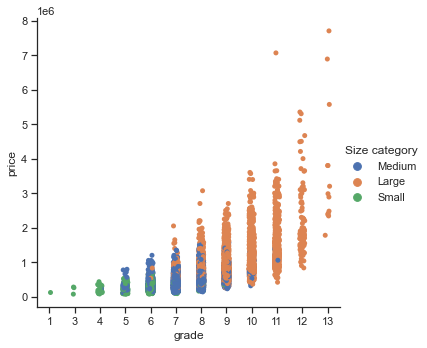

In [20]:
# Create a categorical plot
sns.set(style = "ticks")
catplot = sns.catplot(x = "grade", y = "price", hue = "Size category", data = df)

# Save plots
catplot.savefig(os.path.join(path, '04 Analysis', 'Visualizations', "catplot.png"))

The categorical plot allows to visualize how the price is related to the grade classification and the size of the living area.
<br>The following observations can be made:
- Houses with a small-sized living area (under 1000 sqft) have a grade classification between 1 and 6 and a price well below 1,000,000 USD
- Houses with a medium-sized living area (1000 sqft to 2500 sqft) have a grade classification between 4 and 9 (with some outliers at grade 10 and 11) and a maximum price around 1,500,000 USD
- Houses with a large-sized living area (over 2500 sqft) have a grade classification above 6 and a maximum price around 5,000,000 USD (with some outliers above)

# 07. Business questions

## I. Original questions

What are the features with the largest impact on home sales prices?
<br>_Insight_: the features displaying a strong positive relationship (i.e. correlation coefficient above 0.5) with the "price" variable are the following:
- **sqft_living**: size of living area (square feet)
- **grade**: classification by construction quality (higher grade indicates better quality)
- **sqft_above**: square feet above ground
- **sqft_living15**: average size of interior housing living space for the closest 15 houses (square feet)
- **bathrooms**: number of bathrooms

## II. New questions

1) How does the view of a property impact the home sales prices?
<br>2) How does the location of a property impact the home sales prices?
<br>3) How have the home sales prices changed over time? Is the trend similar across geographic areas?

# 08. Define hypotheses

1) If a house has a larger living area, then its sales price will be higher
<br>2) If a house has a higher grade of construction, then its sales price will be higher

# 09. Export dataframe

In [21]:
df.to_csv(os.path.join(path,'02 Data','Prepared Data','kc_house_data_final.csv'))